## Задание 5
Таблица интервальных частот дневной логарифмической доходности первой (для данного варианта) компании за последний полный календарный год. Здесь и далее дневная логарифмическая доходность рассчитывается на основе поля «CLOSE» с коэффициентом 100.

In [38]:
# время выполнения 0.297988 s
import IPython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.stats as st
from math import floor

In [39]:
%%javascript
var k = IPython.notebook.kernel;
k.execute('this_nb_name_ext = "' + IPython.notebook.notebook_name + '"');

<IPython.core.display.Javascript object>

In [40]:
# некоторые вспомогательные функии
def thisfname(): #Имя этого блокнота
    this_notebook_name = os.path.splitext(this_nb_name_ext)[0]
    return this_notebook_name

# читает файл AKRN.txt
def read_AKRN(file, year):
    csvtab = pd.read_csv(file, sep=',', engine='python') # чтение файла
    df = pd.DataFrame()
    df['date'] = pd.to_datetime(csvtab['<DATE>'], format='%Y%m%d')
    df['CLOSE_AKRN'] = csvtab['<CLOSE>']
    df = df[(df['date']>=datetime(year, 1, 1)) & (df['date']<datetime(year + 1, 1, 1))]
    df.set_index('date', inplace = True)
    return df

# расчитывается квантиль
def norm_quantile(newtab, level):
    newtab = np.sort(newtab)
    if (newtab.shape[0] * level) % 1 != 0:
        return newtab[int(floor(newtab.shape[0] * level))]
    elif (newtab.shape[0] * level) % 1 == 0:
        return (newtab[int(floor(newtab.shape[0] * level)) - 1] + newtab[int(floor(newtab.shape[0] * level))]) / 2
    
# преобразлвание в latex таблицу
def _repr_latex_(self):
    return self.to_latex()

pd.set_option('display.notebook_repr_html', True)
pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [41]:
# 5
tickers = ['AKRN', 'APTK', 'CHMK', 'LKOH', 'SBER'] # Тикеры
myDataPath = 'C:/Users/timha/OneDrive/Рабочий стол/лаба/' # путь к файлам
year = 2018 # последний полный год

In [42]:
newtab = read_AKRN(myDataPath + tickers[0] + '.txt', year) # чтение файла
newtab = 100*np.log(newtab.divide(newtab.shift(+1))) # логарифмическая доходность за 2018 год
newtab = newtab.dropna() # удаление NaN 
newtab['prob'] = 1/newtab.shape[0]
# таблица частот
low = int(round(norm_quantile(newtab['CLOSE_AKRN'], 0.01)) - 5)
hight = int(round(norm_quantile(newtab['CLOSE_AKRN'], 0.99)) + 5) 
interval = np.arange(low, hight + 1, 1)
interval[0] -= 1 # для включения нижней границы
interval[len(interval) - 1] += 1
# интрервал в одном случае попал в другом нет
new_1 = np.array(pd.cut(newtab['CLOSE_AKRN'], interval, right = False).value_counts(sort = False))
new_2 = np.array(pd.cut(newtab['CLOSE_AKRN'], interval, right = True).value_counts(sort = False))
new_3 = (new_1 + new_2)/2
final = pd.DataFrame()
# таблица частот готова
final['lo'], final['hi'], final['fr'] = np.arange(low, hight, 1), np.arange(low + 1, hight + 1, 1), new_3
final

,lo,hi,fr
0,-8,-7,0.0
1,-7,-6,0.0
2,-6,-5,0.0
3,-5,-4,0.0
4,-4,-3,2.0
5,-3,-2,4.0
6,-2,-1,11.0
7,-1,0,93.0
8,0,1,115.0
9,1,2,23.0


In [43]:
final.to_csv(thisfname() + ".Объем торгов в миллиардах.csv", index=False, decimal=',', sep=';', encoding='utf-8-sig')

## Задание 6
Гистограмма частот (не плотности частот!), соответствующая таблице частот из предыдущего пункта, и график плотности нормального распределения в подходящих единицах измерения (на одном рисунке).

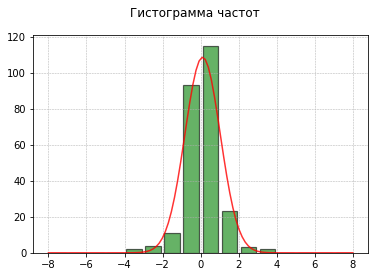

In [44]:
# 6
div2 = (final['lo'] + final['hi'])/2
n = final['fr'].sum()
prob = final['fr']/n
dlaw = pd.DataFrame()
dlaw['val'], dlaw['prob'] = div2, prob # дискретное распределение
mu = (dlaw['val']*dlaw['prob']).sum() # мат. ожидание
var = [(((dlaw['val']**2)*dlaw['prob']).sum() - mu**2)**(0.5)] # дисперсия
# нормальное распределение
plt.plot(np.linspace(low, hight, 100), st.norm.pdf(np.linspace(low, hight, 100), mu, var)*n , 'r', alpha = 0.8)
# гистограмма
x = np.arange(low + 0.5, hight + 0.5, 1)
y = final['fr'].values.tolist()
plt.bar(x, y, color = 'green', alpha = 0.6, edgecolor='black', linewidth = 1.2)
plt.suptitle('Гистограмма частот')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()